In [1]:
from cellmask_model import CellMaskModel
import os
import cellmask_model
import importlib
importlib.reload(cellmask_model)
from cellmask_model import CellMaskModel, dice_evaluate



#first_path = os.getcwd() + '/saved_model/cp_model'
#second_path = os.getcwd() + '/saved_model/mask_model'
#model.import_model(first_path_new_mode,second_path)




#(img, mask) = model.testLoader_img(0)



#images = np.array(images)

c:\Users\rz200\Anaconda3\envs\cellenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
images_path = os.getcwd() + '/812_plate/'
model = CellMaskModel(device="cuda:0")

In [3]:
images_path = os.getcwd() + '/812_plate/'
model = CellMaskModel(device="cuda:0")
model.get_data(images_path)
first_path_new_model = os.getcwd() + '/saved_model/cp_model_2'
second_path_new_model = os.getcwd() + '/saved_model/mask_model_2'

importing images
(5, 1080, 1080, 4)
(5, 1080, 1080, 4)
imported images successfully
getting model


100%|██████████| 25.3M/25.3M [00:05<00:00, 4.51MB/s]


got model
getting data
got data


c:\Users\rz200\Documents\developments\u_net_exploration\data_acquiring.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  flows = np.array(flows)
c:\Users\rz200\Documents\developments\u_net_exploration\data_acquiring.py:157: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:210.)
  imgs_aug = torch.tensor(imgs_aug)


In [5]:
model.train_models(4)
model.save_model(first_path_new_model, second_path_new_model)

[INFO] training the network...
num epochs: 4 <class 'int'>
learning rate: 0.001
loss: mse
training images: 2672
testing images: 1317
[INFO] EPOCH: 1/4  Train loss: 0.001713  Test loss: 0.001683  Time taken: 63s  Remaining time: 189s
[INFO] EPOCH: 2/4  Train loss: 0.001640  Test loss: 0.001578  Train loss change: 0.02  Test loss change: -0.03  Time taken: 63s  Remaining time: 127s
[INFO] EPOCH: 3/4  Train loss: 0.001601  Test loss: 0.001564  Train loss change: -0.00  Test loss change: -0.08  Time taken: 64s  Remaining time: 64s
[INFO] EPOCH: 4/4  Train loss: 0.001559  Test loss: 0.001531  Train loss change: -0.00  Test loss change: -0.01  Time taken: 64s  Remaining time: 0s
[INFO] training the network...
num epochs: 4 <class 'int'>
learning rate: 0.001
loss: dice
training images: 2672
testing images: 1317


c:\Users\rz200\Anaconda3\envs\cellenv\lib\site-packages\torch\nn\functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[INFO] EPOCH: 1/4  Train loss: 0.059118  Test loss: 0.038648  Time taken: 66s  Remaining time: 198s
[INFO] EPOCH: 2/4  Train loss: 0.035706  Test loss: 0.035448  Train loss change: -0.02  Test loss change: 0.04  Time taken: 64s  Remaining time: 128s
[INFO] EPOCH: 3/4  Train loss: 0.030582  Test loss: 0.033641  Train loss change: -0.01  Test loss change: -0.04  Time taken: 64s  Remaining time: 64s
[INFO] EPOCH: 4/4  Train loss: 0.027448  Test loss: 0.021680  Train loss change: -0.02  Test loss change: -0.02  Time taken: 63s  Remaining time: 0s


In [15]:
model.import_model(first_path_new_model, second_path_new_model)

In [8]:
print(dice_evaluate(model))

im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)


In [7]:
import numpy as np
import tifffile

def import_images(images_path,num_imgs=20):
    images = [np.squeeze(tifffile.imread(images_path + str(i) + '.tif')) for i in range(num_imgs)]
    return images

images = import_images(images_path)
imgs = [(image-np.min(image))/(np.max(image)-np.min(image)) for image in images]

True
(1080, 1080)
(1080, 1080)
im1 shape: (1080, 1080)
im2 shape: (1080, 1080)
0.9446584027837975
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
unique pred [0 1]


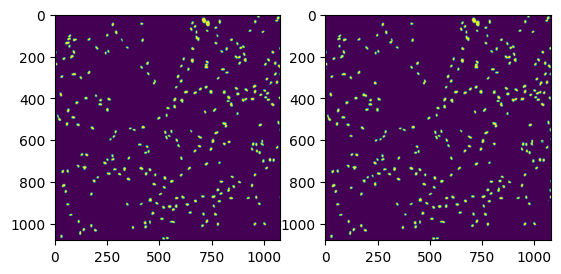

In [9]:
import matplotlib.pyplot as plt
img = imgs[2][:,:,0]
pred = model.eval(img)

from cellpose import models, core
model_cellpose = models.CellposeModel(model_type='nuclei',gpu=core.use_gpu())
cellpose_mask, _, _ = model_cellpose.eval(img,channels=[[0,0]],cellprob_threshold=False)

#plt.imshow()
#plt.show()

print(core.use_gpu())
print(np.where(cellpose_mask>0,1,0).shape)
print(pred[0].shape)
print(model.dice_coeff(np.where(cellpose_mask>0,1,0),pred[0])) #dice coeff should be between ground truth mask and prediction mask, not original image and ground truth mask
#doesn't make sense if the dice loss predicts between raw and dice loss
pred_0 = pred[0]
print(pred_0)
print('unique pred',np.unique(pred_0))

plt.subplot(1,2,1)
plt.imshow(np.where(cellpose_mask>0,1,0))
plt.subplot(1,2,2)
plt.imshow(pred[0])
plt.show()

In [23]:
import cv2
import numpy as np
import math

image = pred_0
original = image.copy()
hsv = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)
hsv = cv2.cvtColor(hsv, cv2.COLOR_BGR2HSV)

hsv_lower = np.array([156,60,0])
hsv_upper = np.array([179,115,255])
mask = cv2.inRange(hsv, hsv_lower, hsv_upper)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

minimum_area = 200
average_cell_area = 650
connected_cell_area = 1000
cells = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > minimum_area:
        cv2.drawContours(original, [c], -1, (36,255,12), 2)
        if area > connected_cell_area:
            cells += math.ceil(area / average_cell_area)
        else:
            cells += 1
print('Cells: {}'.format(cells))
cv2.imshow('close', close)
cv2.imshow('original', original)

error: OpenCV(4.6.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0xf2302844::Set<3,4,-1>,struct cv::impl::A0xf2302844::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)
